# Heat Transfer Equation

In mathematics and physics, the heat equation is a certain partial differential equation. Solutions of the heat equation are sometimes known as caloric functions. The theory of the heat equation was first developed by Joseph Fourier in 1822 for the purpose of modeling how a quantity such as heat diffuses through a given region. It is considered one of the most important partial differential equations.

Heat equation relates the time variation of temperature distribution u with the spatial variation as below:

\begin{equation*}
    \frac{\partial u}{\partial t} = \alpha \nabla^2 u
\end{equation*}

where $\alpha$ is called the 'thermal diffusivity' of the given medium.

Source: https://en.wikipedia.org/wiki/Heat_equation

In this Python script, we will see an example showing a solution of this heat equation. For convenience, I will just show an example of one-dimensional heat equation.

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Parameters
l = 10.0  # Length of the rod
t = 2.0   # Total time
n_x = 200  # Number of spatial points
n_t = 2000 # Number of time steps
alpha = 0.05  # Thermal diffusivity

# Discretization
dx = l / n_x
dt = t / n_t
x = np.linspace(0, l, n_x)
u = np.zeros(n_x)

We are using finite difference method to solve this second order differential equation. For example, for the heat equation given above:

\begin{equation*}
   \frac{\partial u [i]}{\partial t} =  \frac{u[i+1] - 2u[i] + u[i-1]}{dx^2} + O[(dx)]
\end{equation*}

Since dx is small, the higher order terms O[(dx)] can be ignored for this purpose. Therefore we can write:

\begin{equation*}
   \frac{\partial u [i]}{\partial t} \approx  \frac{u[i+1] - 2u[i] + u[i-1]}{dx^2} \\
    du [i] \approx  \frac{u[i+1] - 2u[i] + u[i-1]}{dx^2} dt \\
\end{equation*}

Let's apply this formula to solve the heat equation.

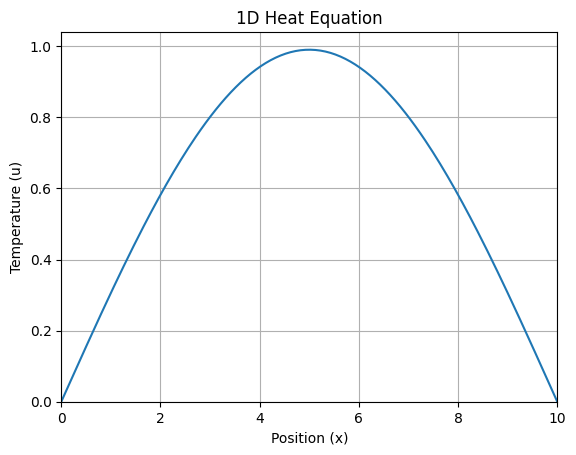

In [27]:
# Initial condition

u [:] = np.sin(np.pi * x / l)  # Initial temperature distribution

# Time-stepping loop

for n in range(n_t):
    u_new = np.copy(u)
    for i in range(1, n_x-1):
        u_new[i] = u[i] + alpha * (u[i+1] - 2*u[i] + u[i-1]) * (dt / (dx**2))
    u = u_new

# Plot the solution
plt.plot(x, u)
plt.xlabel("Position (x)")
plt.ylabel("Temperature (u)")
plt.title("1D Heat Equation")
plt.xlim(0,l)
plt.ylim(0,)
plt.grid()
plt.show()